In [0]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

(x_train, _), (x_test, _) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [0]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 


In [0]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
import matplotlib.pyplot as plt

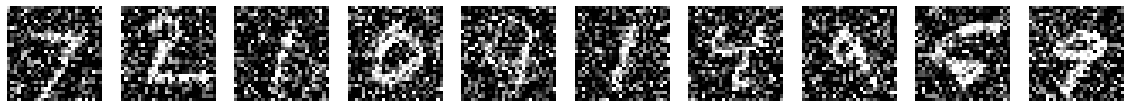

In [24]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
input_img = Input(shape=(28, 28, 1)) 

In [0]:
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [0]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [29]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [30]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1409 - val_loss: 0.1273
Epoch 3/100
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1306 - val_loss: 0.1255
Epoch 4/100
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1300 - val_loss: 0.1226
Epoch 5/100
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1325 - val_loss: 0.1313
Epoch 6/100
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1290 - val_loss: 0.1225
Epoch 7/100
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1439 - val_loss: 0.1271
Epoch 8/100
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1262 - val_loss: 0.1193
Epoch 9/100
60000/60000 [==============================] - 161s 3ms/step - loss: 0.1492 - val_loss: 0.1226
Epoch 10/100
60000/60000 [====================

KeyboardInterrupt: ignored